In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# !cp /content/drive/Drive'ım/VeriAnalizi/Datasets/airbnb_nyc_final.csv -r /content

df_airbnb = pd.read_csv("/content/drive/MyDrive/VeriAnalizi/Datasets/AB_NYC_2019.csv", delimiter=",", encoding="UTF-8")

In [17]:
sns.set(rc={'figure.figsize':(13,10)})

In [18]:
df_airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
df_airbnb.drop(["name","id","host_id","host_name"], inplace=True, axis=1)

In [41]:
df_airbnb.info()
df_airbnb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.380000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,5.894766,5.894766,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.640000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.100000,1.0,0


In [28]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
  df_airbnb[column] = pd.to_numeric(df_airbnb[column], errors="coerce")

  max_value = (3*df_airbnb[column].std()) + df_airbnb[column].mean()
  min_value = -((3*df_airbnb[column].std()) + df_airbnb[column].mean())

  mean = df_airbnb.loc[(df_airbnb[column] > min_value) & (df_airbnb[column] < max_value), column].mean()

  if mean is not np.nan:
    df_airbnb.loc[(df_airbnb[column] < min_value) | (df_airbnb[column] > max_value), column] = mean
    df_airbnb[column].fillna(mean, inplace=True)
  else:
    df_airbnb[column].fillna(df_airbnb[column].mean(), inplace=True)

  df_airbnb[column] = df_airbnb[column].astype("int64")

In [29]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

<Axes: xlabel='price', ylabel='Count'>

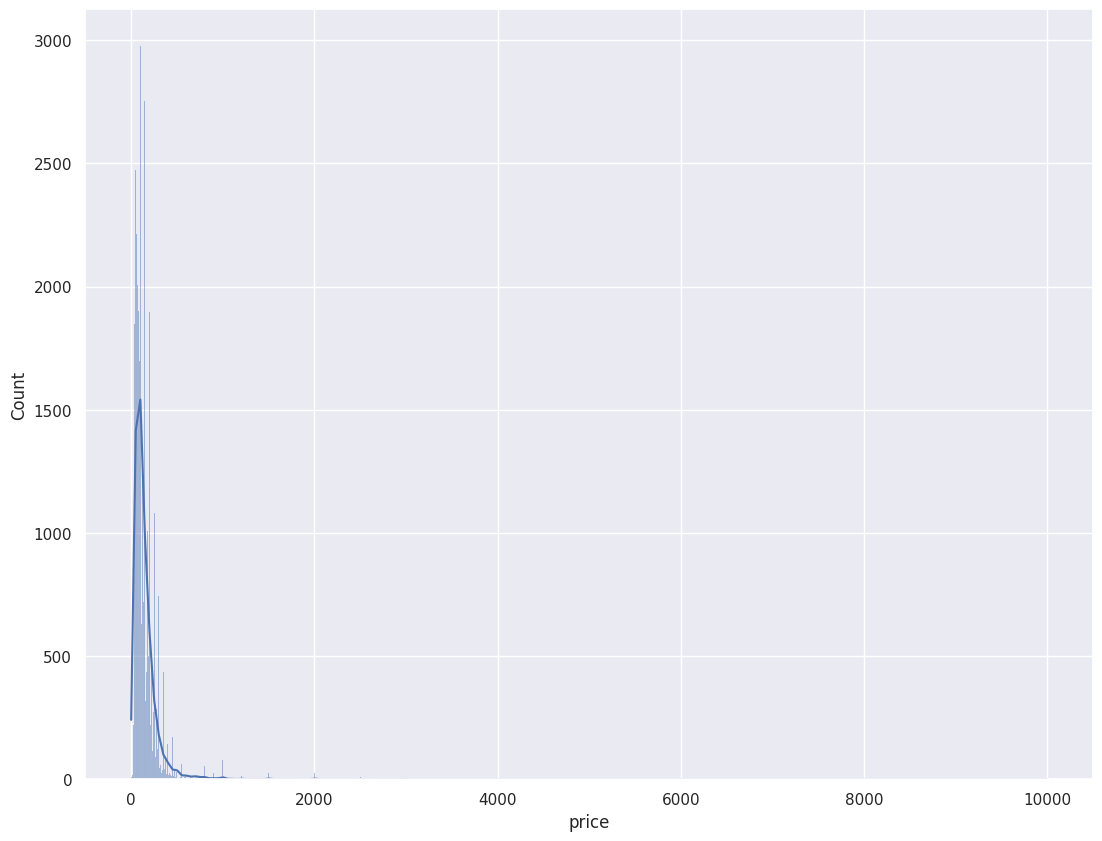

In [31]:
sns.histplot(df_airbnb["price"], kde=True)

In [32]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df_airbnb[column] = pd.to_numeric(df_airbnb[column], errors="coerce")

  max_value = (3*df_airbnb[column].std()) + df_airbnb[column].mean()
  min_value = -((3*df_airbnb[column].std()) + df_airbnb[column].mean())

  mean = df.loc[(df_airbnb[column] > min_value) & (df_airbnb[column] < max_value), column].mean()

  if mean is not np.nan:
    df_airbnb.loc[(df_airbnb[column] < min_value) | (df_airbnb[column] > max_value), column] = mean
    df_airbnb[column].fillna(mean, inplace=True)
  else:
    df_airbnb[column].fillna(df_airbnb[column].mean(), inplace=True)

  df_airbnb[column] = df_airbnb[column].astype("float64")

In [33]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

<Axes: xlabel='price', ylabel='Count'>

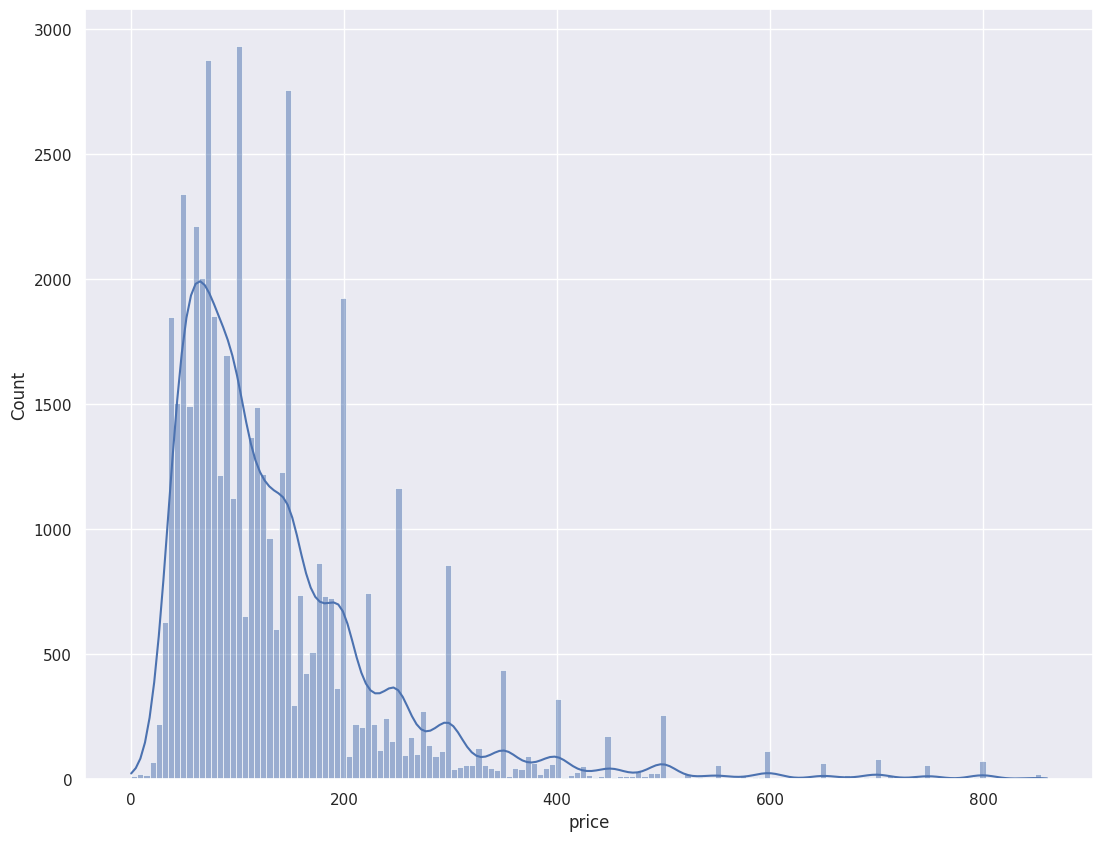

In [34]:
sns.histplot(df_airbnb["price"], kde=True)

In [37]:
df_airbnb.groupby("room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [38]:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728754,0.054225,40.49979,40.69010,40.72307,40.762995,40.89245
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,138.746903,107.130617,0.00000,69.00000,106.00000,175.000000,860.00000
minimum_nights,48895.0,5.888782,8.886148,1.00000,1.00000,3.00000,5.000000,68.00000
number_of_reviews,48895.0,18.182350,29.341038,0.00000,1.00000,5.00000,20.000000,156.00000
reviews_per_month,48895.0,2.276901,2.301056,0.01000,0.28000,1.22000,4.410000,9.39000
calculated_host_listings_count,48895.0,2.306398,3.669638,1.00000,1.00000,1.00000,2.000000,34.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [42]:
df_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.380000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,5.894766,5.894766,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.640000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.100000,1.0,0


In [49]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

In [59]:
df_airbnb["last_review"] = df_airbnb["last_review"].astype("datetime64[ns]")

In [60]:
object_columns = df_airbnb.select_dtypes("object").columns
object_columns


Index([], dtype='object')

In [61]:
for column in object_columns:
  df_airbnb[column] = df_airbnb[column].astype("category")
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  category      
 1   neighbourhood                   48895 non-null  category      
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  category      
 5   price                           48895 non-null  float64       
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  float64       
 11  av

In [62]:
df_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19 00:00:00.000000000,0.210000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00.000000000,0.380000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1970-01-01 00:00:00.000000005,5.894766,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05 00:00:00.000000000,4.640000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00.000000000,0.100000,1.0,0


In [63]:
df_airbnb.pivot_table(values=["number_of_reviews", "availability_365", "price"],
                      columns ="room_type",
                      aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room
availability_365,111.920304,111.203933,162.000862
number_of_reviews,18.323704,18.215802,14.442241
price,190.404829,83.722141,66.252576


In [64]:
df_airbnb["room_type"].unique()

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [65]:
df_airbnb["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Newyork Airbnb Room Types')

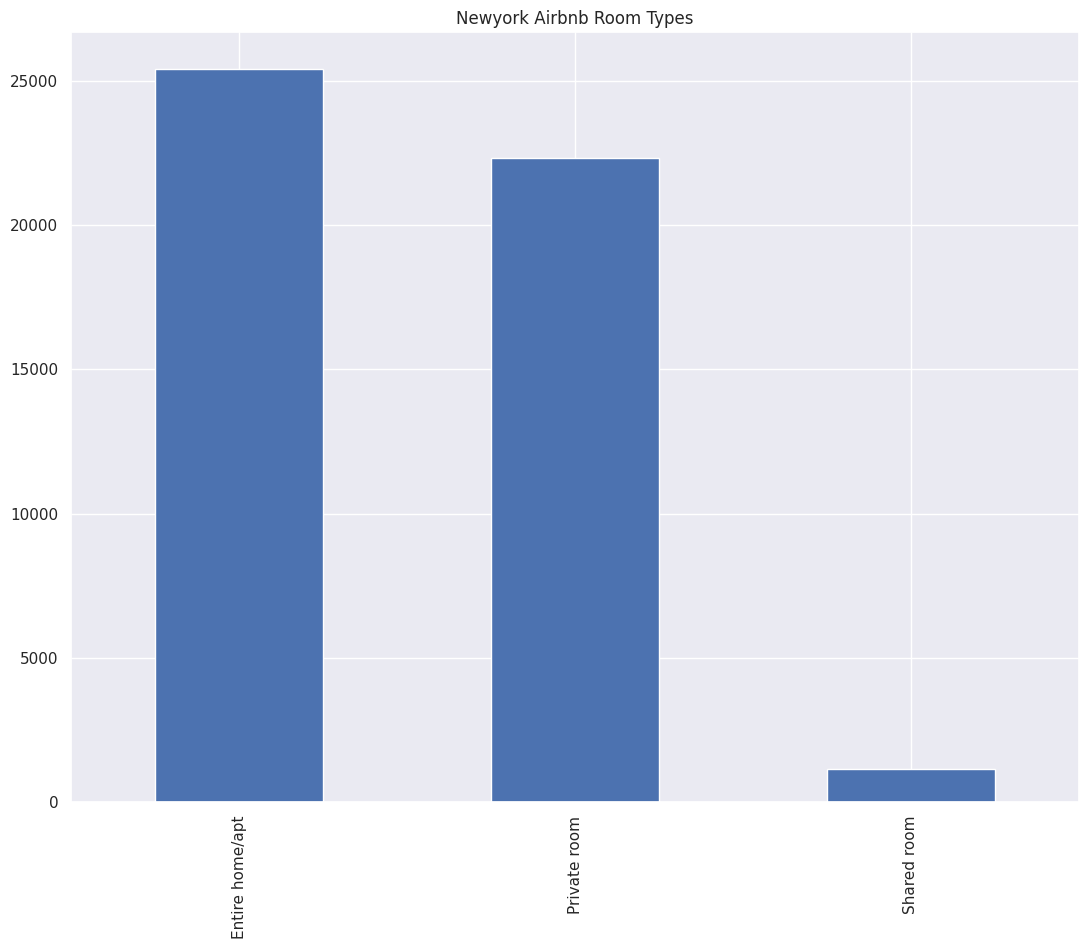

In [66]:
df_airbnb["room_type"].value_counts().plot.bar().set_title("Newyork Airbnb Room Types")

Text(0.5, 1.0, 'Newyork Airbnb Neighbourhood Group Counts')

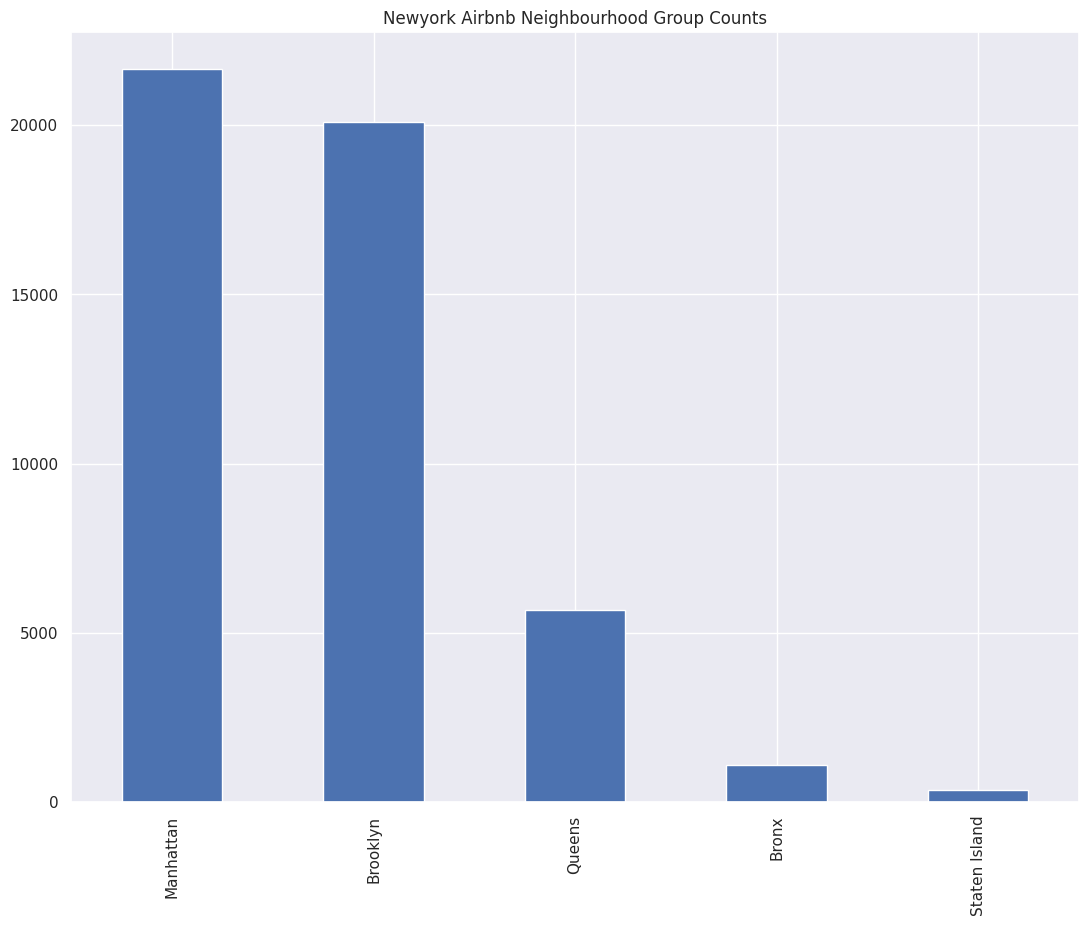

In [67]:
df_airbnb["neighbourhood_group"].value_counts().plot.bar().set_title("Newyork Airbnb Neighbourhood Group Counts")


Text(0.5, 1.0, 'Neighbourhood Price Density')

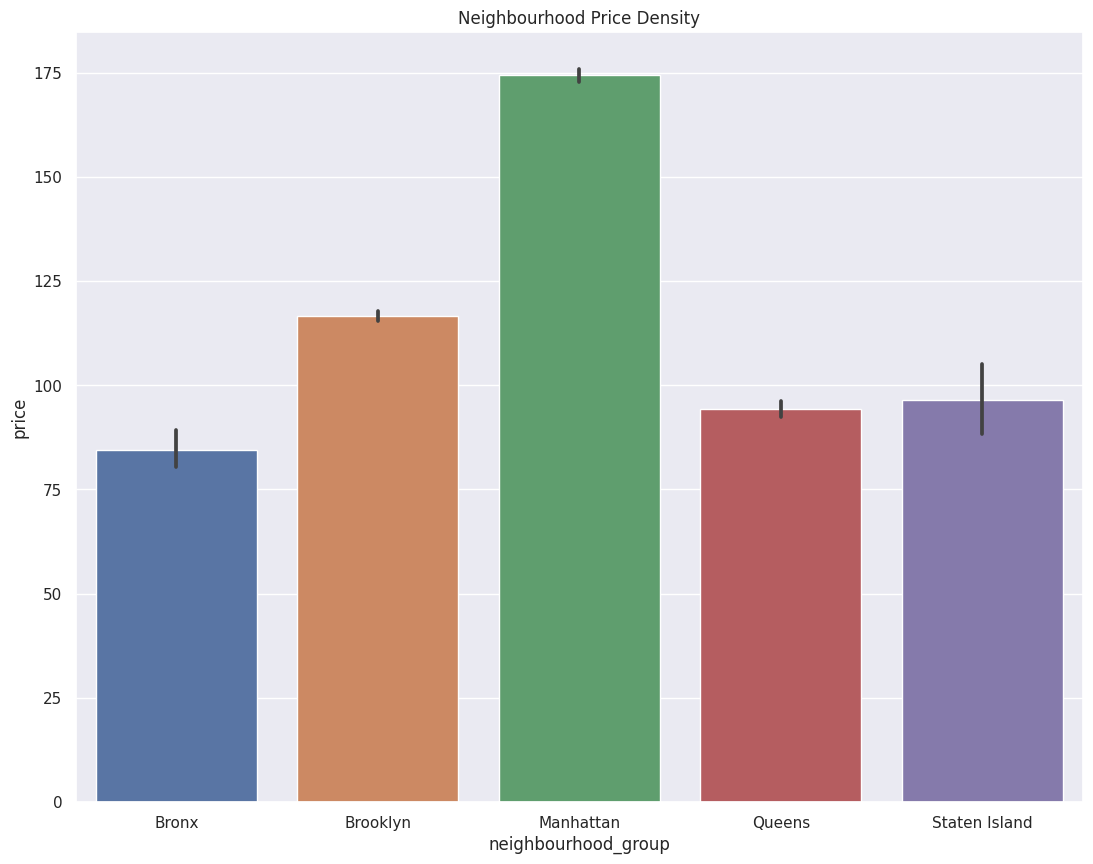

In [68]:
sns.barplot(data = df_airbnb, x="neighbourhood_group", y="price").set_title("Neighbourhood Price Density")

Text(0.5, 1.0, 'Neighbourhood Group - Room Type - Price')

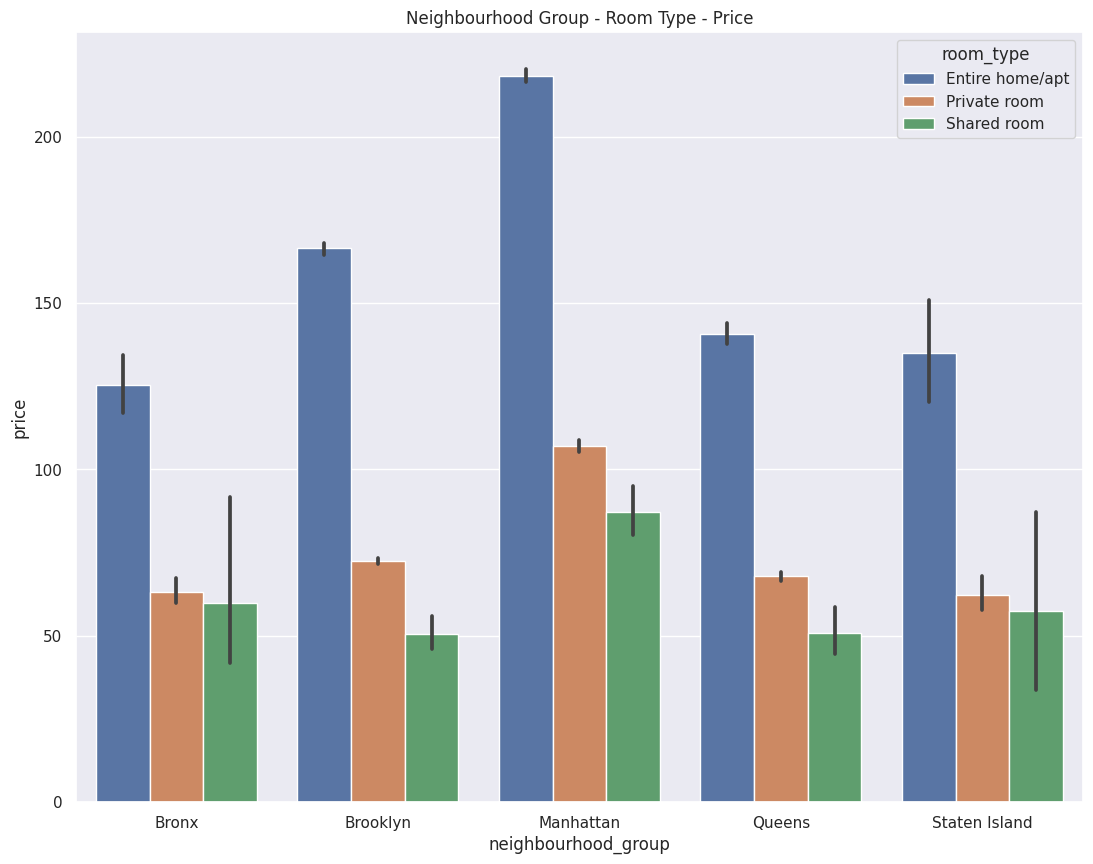

In [69]:
sns.barplot(data = df_airbnb, x="neighbourhood_group", y="price",hue="room_type").set_title("Neighbourhood Group - Room Type - Price")

<ipython-input-70-62d77783f1e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="",legend=False)


<Axes: >

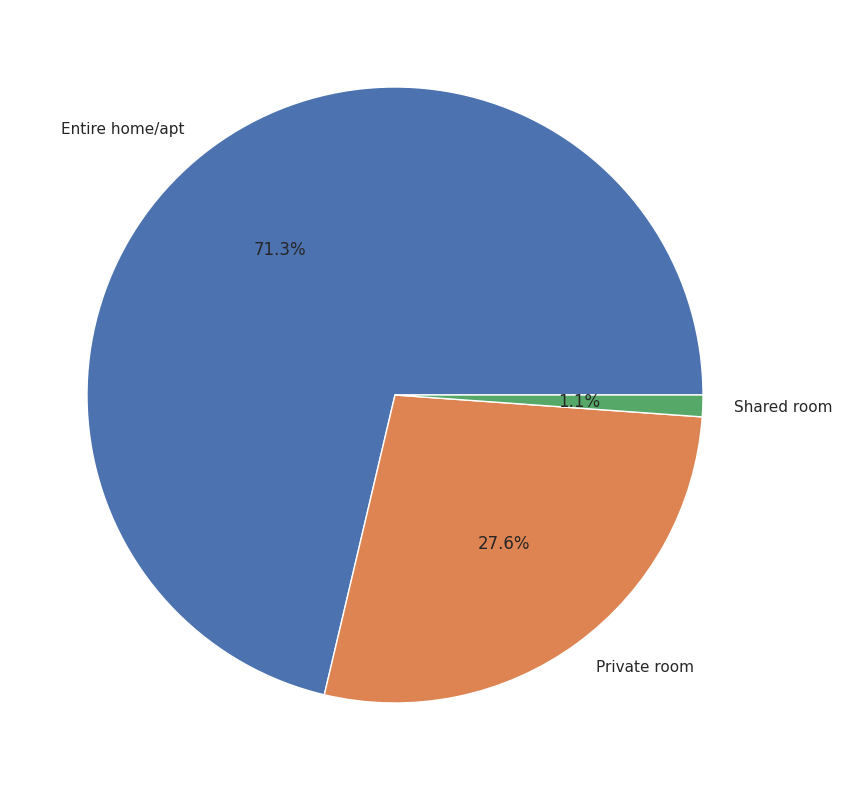

In [70]:
df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="",legend=False)

In [71]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  category      
 1   neighbourhood                   48895 non-null  category      
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  category      
 5   price                           48895 non-null  float64       
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  float64       
 11  av

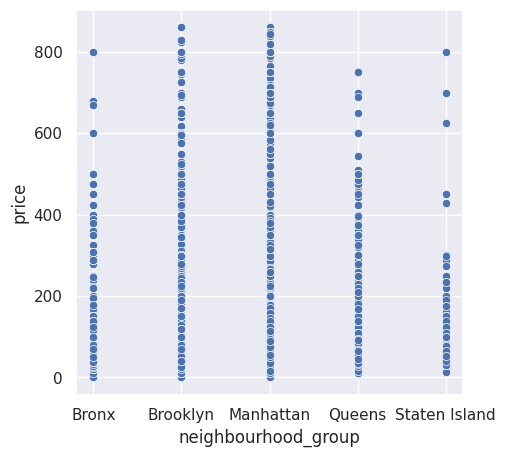

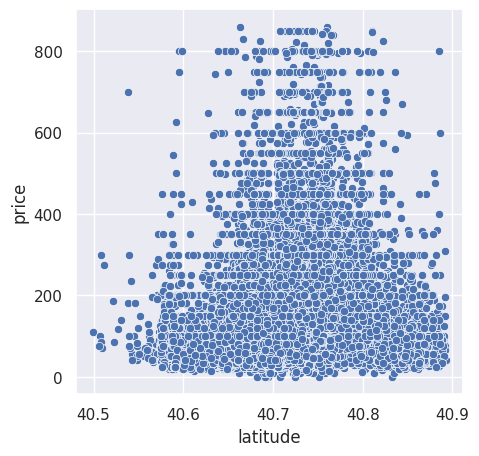

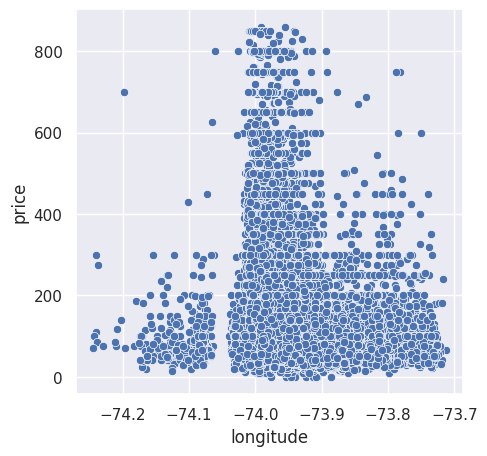

In [72]:
cols = ["neighbourhood_group", "latitude", "longitude"]


for col in cols:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=col, y="price", data=df_airbnb)

<Axes: xlabel='minimum_nights', ylabel='price'>

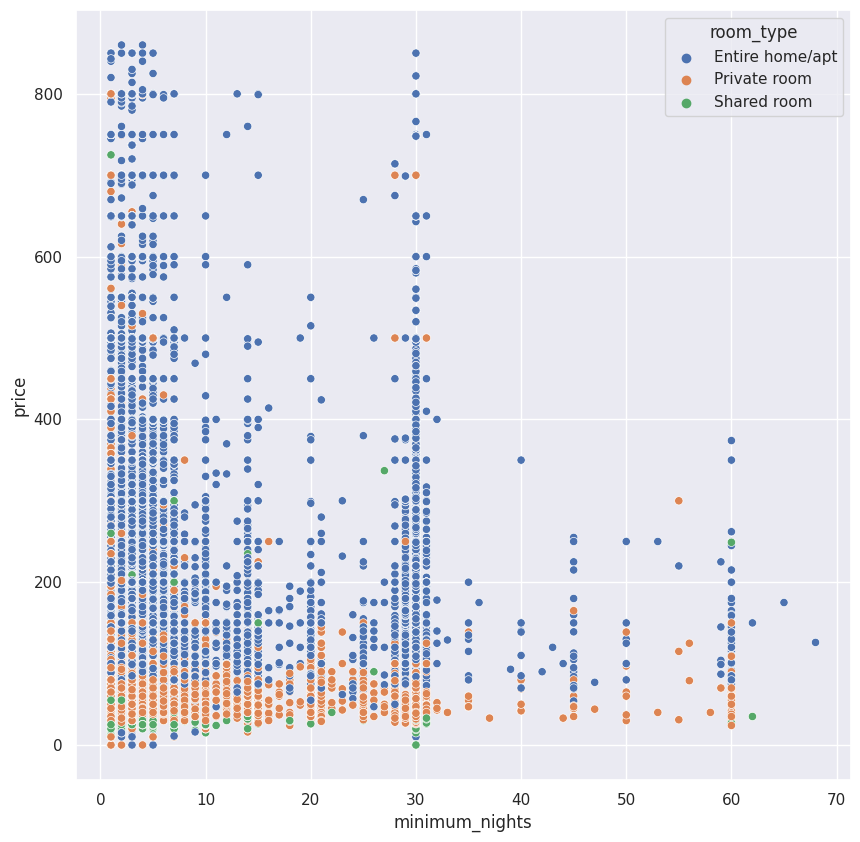

In [74]:

plt.figure(figsize=(10,10))
sns.scatterplot( data=df_airbnb, x="minimum_nights", y="price", hue="room_type")

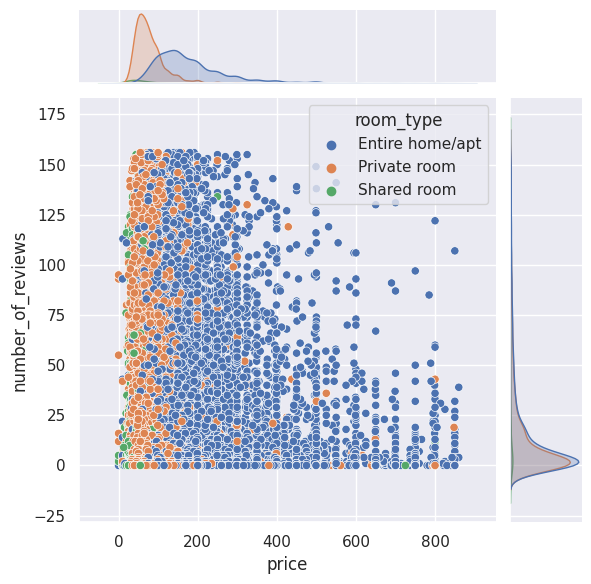

In [81]:
sns.jointplot(x="price",y=df_airbnb["number_of_reviews"], data=df_airbnb, hue="room_type")